In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [39]:
deliveries = pd.read_csv('/Users/amuadhikari/Desktop/DATA PROJECTS/csv_data/IPL Ball-by-Ball 2008-2020.csv')
matches = pd.read_csv('/Users/amuadhikari/Desktop/DATA PROJECTS/csv_data/IPL Matches 2008-2020.csv')

In [53]:
deliveries.info

<bound method DataFrame.info of              Id  Inning  Over  Ball      Batsman  Non_Striker  \
0        335982       1     6     5   RT Ponting  BB McCullum   
1        335982       1     6     6  BB McCullum   RT Ponting   
2        335982       1     7     1  BB McCullum   RT Ponting   
3        335982       1     7     2  BB McCullum   RT Ponting   
4        335982       1     7     3   RT Ponting  BB McCullum   
...         ...     ...   ...   ...          ...          ...   
193463  1237181       1    12     5      RR Pant      SS Iyer   
193464  1237181       1    12     6      RR Pant      SS Iyer   
193465  1237181       1    13     1      RR Pant      SS Iyer   
193466  1237181       1    13     2      RR Pant      SS Iyer   
193467  1237181       1    13     3      SS Iyer      RR Pant   

                 Bowler  Batsman_Runs  Extra_Runs  Total_Runs  Non_Boundary  \
0             AA Noffke             1           0           1             0   
1             AA Noffke      

In [41]:
deliveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [42]:
deliveries = deliveries.drop(columns = ['dismissal_kind','player_dismissed', 'fielder','extras_type'])

In [45]:
deliveries.duplicated().sum()

1

In [47]:
deliveries = deliveries.drop_duplicates()

In [50]:
deliveries.columns = deliveries.columns.str.title()

In [51]:
deliveries.head(3)

,Id,Inning,Over,Ball,Batsman,Non_Striker,Bowler,Batsman_Runs,Extra_Runs,Total_Runs,Non_Boundary,Is_Wicket,Batting_Team,Bowling_Team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore


In [56]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [57]:
matches.columns = matches.columns.str.title()

In [58]:
matches.head(5)

,Id,City,Date,Player_Of_Match,Venue,Neutral_Venue,Team1,Team2,Toss_Winner,Toss_Decision,Winner,Result,Result_Margin,Eliminator,Method,Umpire1,Umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [69]:
matches['City'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [70]:
matches['Venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [74]:
matches['Player_Of_Match'].value_counts().index[0]

'AB de Villiers'

In [78]:
deliveries.head(3)

,Id,Inning,Over,Ball,Batsman,Non_Striker,Bowler,Batsman_Runs,Extra_Runs,Total_Runs,Non_Boundary,Is_Wicket,Batting_Team,Bowling_Team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore


In [80]:
df_kohli = deliveries[deliveries['Batsman'] == 'V Kohli']

In [82]:
len(df_kohli[df_kohli['Batsman_Runs'] == 1])

1919

In [83]:
len(df_kohli[df_kohli['Batsman_Runs'] == 2])*2


692

In [84]:
len(df_kohli[df_kohli['Batsman_Runs'] == 3])*3

39

In [85]:
len(df_kohli[df_kohli['Batsman_Runs'] == 4])*4

2016

In [86]:
len(df_kohli[df_kohli['Batsman_Runs'] == 6])*5

1010

In [87]:
values = [1919,692,39,2016,1010]
labels = [1,2,3,4,6]

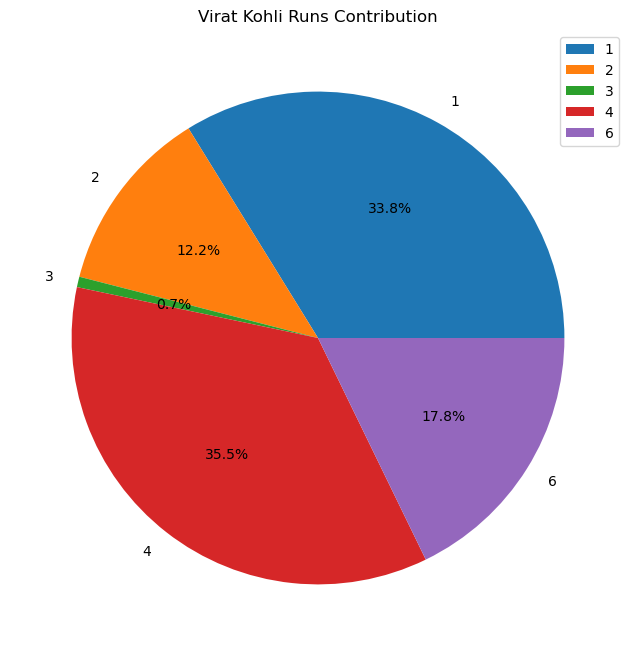

In [100]:
plt.figure(figsize=(8, 8))
plt.pie(values, labels = labels,autopct='%1.1f%%')
plt.title('Virat Kohli Runs Contribution')
plt.legend(loc = 'upper right', labels = labels)
plt.show()

In [106]:
matches['Season'] = pd.to_datetime(matches['Date']).dt.year

In [114]:
data = matches[['Season','Toss_Decision']].value_counts().reset_index().sort_values('Season')
data

,Season,Toss_Decision,count
13,2008,field,32
16,2008,bat,26
19,2009,field,22
10,2009,bat,35
20,2010,field,21
7,2010,bat,39
18,2011,bat,25
4,2011,field,48
8,2012,bat,37
9,2012,field,37


<Axes: xlabel='Season', ylabel='count'>

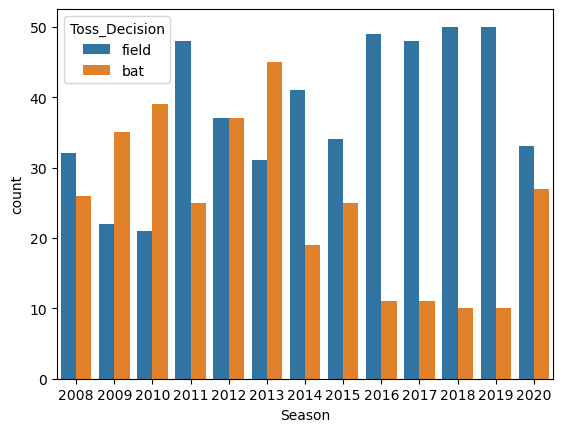

In [118]:
sns.barplot(x = 'Season', y = 'count', hue = 'Toss_Decision', data = data)